# Logistic regression classifier

The task is to train a binary classifier based on logistic regression model.

So, we have class 1 and class 2 and the corresponding probabilities are given by $p_1$ and $p_2$:

$p_1 = p(x;w) = \sigma(w^T x)$

$p_2=(1 - p)$, and $\sigma(z)$ is the sigmoid logistic function,

$\sigma(z) = \frac{1}{1+\exp(-z)}$,

$x$ is the input and $w$ is the vector of parameters. Here we assume that input vector $x$ includes the constant term 1 so that there is no bias term.

The log likelihood for each of the training samples is given by:
\begin{equation*}
L(x_i;w)=  y_i \text{log } p(x_i;w) + (1-y_i) \text{log } (1-p(x_i;w)),
\end{equation*}

And log-likelohood for the training set of $N$ samples can be expressed as

\begin{equation*}
L(w)= \frac{1}{N} \big( \sum_{i=1}^N y_i(w^T x_i) - \text{log}(1+e^{w^T x_i})  \big).
\end{equation*}

Given that
\begin{equation*}
\frac{\partial L}{\partial w} = X^T (y - p),
\end{equation*}

where $p$ is a vector of values $p$ for each of the training samples.
Fit the parameters of the model that by maximizing the log-likelihood of the loss function.

Use digits images for classification and choose only digits "4" and "9" from the data set so that it is a binary classification. Do a train and test split. Plot the likelihood and the accuracy of the classifier on the train and test data.

**Note**.

Mind the numerical problems you will have when computing log of zero probabilities. Add a small positive constant, e.g. $10^{-8}$ in order to avoid that.

(288, 2) (73, 2) (361, 2)


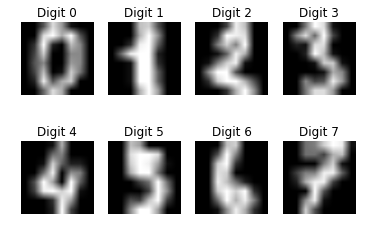

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from scipy.misc import derivative

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear')
    plt.title('Digit %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
dataset = np.array(list(zip(data, digits.target)))
_class_1 = dataset[:, 1] == 7
_class_2 = dataset[:, 1] == 1

_class_1 = dataset[_class_1]
_class_1[:, 1] = 1  # digit 4
_class_2 = dataset[_class_2]
_class_2[:, 1] = 0

dataset = np.concatenate((_class_1, _class_2))
np.random.shuffle(dataset)
train_index = int(dataset.shape[0] * 0.8)

train = dataset[:train_index]
test = dataset[train_index:]

print(train.shape, test.shape, dataset.shape)

In [173]:
def g(x):
    return 1 / (1 + np.exp(-x))

def p(x, w):
    return g(w.dot(x.T))
    
def L(x, y, w):
    return -1 / x.shape[0] * np.sum(y * w.dot(x.T) - np.log(1 + np.exp(W.dot(x.T))))

def grad_L(x, y, w):
    return -x.T.dot(y - p(x, w))

def transform_x(x, degree=2):
    _x = []
    for row in x:
        _x.append(np.concatenate((row, row**2)))
    return np.array(_x)

def accuracy(y, p):
    _res = (y == p) * 1
    return np.sum(_res) / y.shape[0]

Epoch: 0, Loss: 0.69552, train_acc: 0.497, test_acc: 0.493
Epoch: 1, Loss: 0.69362, train_acc: 0.497, test_acc: 0.493
Epoch: 2, Loss: 0.69173, train_acc: 0.497, test_acc: 0.493
Epoch: 3, Loss: 0.68986, train_acc: 0.497, test_acc: 0.493
Epoch: 4, Loss: 0.68800, train_acc: 0.497, test_acc: 0.493
Epoch: 5, Loss: 0.68615, train_acc: 0.497, test_acc: 0.493
Epoch: 6, Loss: 0.68431, train_acc: 0.497, test_acc: 0.493
Epoch: 7, Loss: 0.68249, train_acc: 0.497, test_acc: 0.493
Epoch: 8, Loss: 0.68068, train_acc: 0.497, test_acc: 0.493
Epoch: 9, Loss: 0.67888, train_acc: 0.497, test_acc: 0.493
Epoch: 10, Loss: 0.67710, train_acc: 0.497, test_acc: 0.493
Epoch: 11, Loss: 0.67532, train_acc: 0.497, test_acc: 0.493
Epoch: 12, Loss: 0.67356, train_acc: 0.497, test_acc: 0.493
Epoch: 13, Loss: 0.67181, train_acc: 0.503, test_acc: 0.507
Epoch: 14, Loss: 0.67007, train_acc: 0.517, test_acc: 0.507
Epoch: 15, Loss: 0.66834, train_acc: 0.559, test_acc: 0.575
Epoch: 16, Loss: 0.66662, train_acc: 0.583, test_a

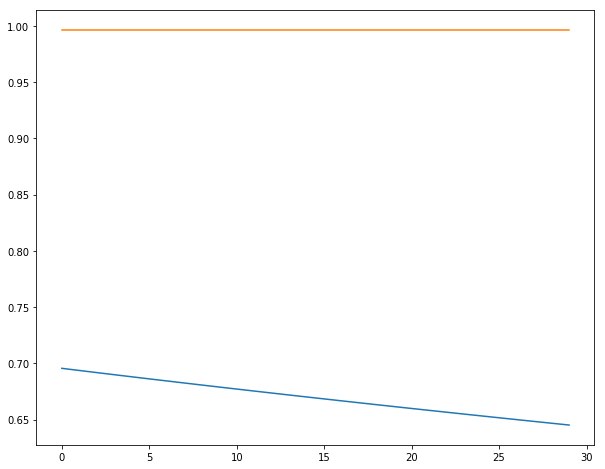

In [180]:
x_train = np.stack(train[:, 0])
y_train = np.stack(train[:, 1])

x_test = np.stack(test[:, 0])
y_test = np.stack(test[:, 1])

# x_train = transform_x(x_train)
# x_test = transform_x(x_test)

W = np.random.random(x_train.shape[1]) * 1e-3

Epoch = 30
lr = 1e-7

losses = []
accuracies = []

for i in range(Epoch):
    _loss = L(x_train, y_train, W)
    
    _tr_p = p(x_train, W)
    _tr_p = (_tr_p > 0.5) * 1
    _tr_acc = accuracy(y_train, _tr_p)
    
    _ts_p = p(x_test, W)
    _ts_p = (_ts_p > 0.5) * 1
    _ts_acc = accuracy(y_test, _ts_p)
    
    print('Epoch: {}, Loss: {:.5f}, train_acc: {:.3f}, test_acc: {:.3f}'.format(i, _loss, _tr_acc, _ts_acc))
    losses.append(_loss)
    accuracies.append(_acc)
    
    W = W - lr * grad_L(x_train, y_train, W)
    
plt.figure(figsize=(10, 8))
plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')